In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import OneHotEncoder

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

In [3]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [4]:
train.describe(include='all')

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
count,3870,3870,3870,3870.000000,3870.000000,3870,3870,3870.000000,3870,3787,...,3870,3870,3618.000000,3870,3870,3870.000000,3870.000000,3870,3870.000000,3870.000000
unique,3870,4,9,NaN,NaN,43,78,NaN,4,61,...,2,107,NaN,162,2,NaN,NaN,2,NaN,NaN
top,ID_GTFAC7PEVWQ9,Nalanda,Rajgir,NaN,NaN,TractorPlough,2022-07-20,NaN,Manual_PuddledRandom,2022-06-28,...,hand,2022-11-05,NaN,2022-12-22,machine,NaN,NaN,plowed_in_soil,NaN,NaN
freq,1,1193,850,NaN,NaN,1038,202,NaN,3346,225,...,3642,169,NaN,107,2098,NaN,NaN,3846,NaN,NaN
mean,NaN,NaN,NaN,28.527907,24.727132,NaN,NaN,4.488372,NaN,NaN,...,NaN,NaN,536.622443,NaN,NaN,26.517829,11.767442,NaN,0.292826,594.269251
std,NaN,NaN,NaN,30.454218,27.994802,NaN,NaN,1.133044,NaN,NaN,...,NaN,NaN,1138.613827,NaN,NaN,3.192873,7.064864,NaN,0.206918,651.916953
min,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,2.000000,10.000000,NaN,0.045455,4.000000
25%,NaN,NaN,NaN,12.000000,10.000000,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,150.000000,NaN,NaN,25.000000,10.000000,NaN,0.156250,300.000000
50%,NaN,NaN,NaN,20.000000,20.000000,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,400.000000,NaN,NaN,26.000000,10.000000,NaN,0.227273,425.000000
75%,NaN,NaN,NaN,35.000000,30.000000,NaN,NaN,5.000000,NaN,NaN,...,NaN,NaN,700.000000,NaN,NaN,30.000000,10.000000,NaN,0.370370,740.000000


In [5]:
train.dtypes

ID                                     object
District                               object
Block                                  object
CultLand                                int64
CropCultLand                            int64
LandPreparationMethod                  object
CropTillageDate                        object
CropTillageDepth                        int64
CropEstMethod                          object
RcNursEstDate                          object
SeedingSowingTransplanting             object
SeedlingsPerPit                       float64
NursDetFactor                          object
TransDetFactor                         object
TransplantingIrrigationHours          float64
TransplantingIrrigationSource          object
TransplantingIrrigationPowerSource     object
TransIrriCost                         float64
StandingWater                         float64
OrgFertilizers                         object
Ganaura                               float64
CropOrgFYM                        

In [6]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [7]:
train['Harv_hand_rent'] = train['Harv_hand_rent'].fillna(0)

In [8]:
train.isnull().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilize

### Handling Date Values

In [9]:
# Converting Date columns from String to DateTime format
train['Harv_date'] = pd.to_datetime(train['Harv_date'])
train['Threshing_date'] = pd.to_datetime(train['Threshing_date'])
train['CropTillageDate'] = pd.to_datetime(train['CropTillageDate'])
train['RcNursEstDate'] = pd.to_datetime(train['RcNursEstDate'])
train['SeedingSowingTransplanting'] = pd.to_datetime(train['SeedingSowingTransplanting'])

In [10]:
# Calculate differences in days between each pair of date columns
train['diff_days_Harv_Thresh'] = (train['Threshing_date'] - train['Harv_date']).dt.days
train['diff_days_Tillage_RcNursEst'] = (train['RcNursEstDate'] - train['CropTillageDate']).dt.days
train['diff_days_Tillage_Seeding'] = (train['SeedingSowingTransplanting'] - train['CropTillageDate']).dt.days
train['diff_days_Tillage_Thresh'] = (train['Threshing_date'] - train['CropTillageDate']).dt.days
train['diff_days_Tillage_Harv'] = (train['Harv_date'] - train['CropTillageDate']).dt.days
train['diff_days_RcNursEst_Thresh'] = (train['Threshing_date'] - train['RcNursEstDate']).dt.days
train['diff_days_RcNursEst_Harv'] = (train['Harv_date'] - train['RcNursEstDate']).dt.days
train['diff_days_RcNursEst_Seeding'] = (train['SeedingSowingTransplanting'] - train['RcNursEstDate']).dt.days
train['diff_days_Seeding_Thresh'] = (train['Threshing_date'] - train['SeedingSowingTransplanting']).dt.days
train['diff_days_Seeding_Harv'] = (train['Harv_date'] - train['SeedingSowingTransplanting']).dt.days



In [11]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,0,-23.0,1,119,119,142.0,142.0,24.0,118,118
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,29,-28.0,2,159,130,187.0,158.0,30.0,157,128
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,30,-10.0,44,195,165,205.0,175.0,54.0,151,121
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,27,1.0,31,196,169,195.0,168.0,30.0,165,138
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,2,-28.0,1,136,134,164.0,162.0,29.0,135,133


In [12]:
train.describe(include='all')

C:\Users\HP\AppData\Local\Temp/ipykernel_5304/4198708820.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include='all')


,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
count,3870,3870,3870,3870.000000,3870.000000,3870,3870,3870.000000,3870,3787,...,3870.000000,3787.000000,3870.000000,3870.000000,3870.000000,3787.000000,3787.000000,3787.000000,3870.000000,3870.000000
unique,3870,4,9,NaN,NaN,43,78,NaN,4,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_GTFAC7PEVWQ9,Nalanda,Rajgir,NaN,NaN,TractorPlough,2022-07-20 00:00:00,NaN,Manual_PuddledRandom,2022-06-28 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1193,850,NaN,NaN,1038,202,NaN,3346,225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-30 00:00:00,NaN,NaN,2022-06-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-27 00:00:00,NaN,NaN,2022-07-31 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,28.527907,24.727132,NaN,NaN,4.488372,NaN,NaN,...,30.112403,-14.594930,14.319897,153.918863,123.806460,168.011091,137.575654,28.832849,139.598966,109.486563
std,NaN,NaN,NaN,30.454218,27.994802,NaN,NaN,1.133044,NaN,NaN,...,26.867903,15.126501,14.586574,32.017500,20.892703,34.149865,21.438736,8.668595,32.956944,21.336689
min,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,-57.000000,1.000000,65.000000,-234.000000,84.000000,-215.000000,1.000000,57.000000,-244.000000
25%,NaN,NaN,NaN,12.000000,10.000000,NaN,NaN,4.000000,NaN,NaN,...,10.000000,-24.000000,3.000000,134.000000,111.000000,143.000000,125.000000,23.000000,117.000000,97.000000


### Imputation

In [13]:
# Assuming 'train' is your DataFrame
# Calculate the most frequent value for each column
most_frequent_values = train.mode().iloc[0]

# Impute missing values with the most frequent value for each column
train_imputed= train.fillna(most_frequent_values)

In [14]:
train_imputed.isnull().sum()

ID                                    0
District                              0
Block                                 0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0
CropTillageDate                       0
CropTillageDepth                      0
CropEstMethod                         0
RcNursEstDate                         0
SeedingSowingTransplanting            0
SeedlingsPerPit                       0
NursDetFactor                         0
TransDetFactor                        0
TransplantingIrrigationHours          0
TransplantingIrrigationSource         0
TransplantingIrrigationPowerSource    0
TransIrriCost                         0
StandingWater                         0
OrgFertilizers                        0
Ganaura                               0
CropOrgFYM                            0
PCropSolidOrgFertAppMethod            0
NoFertilizerAppln                     0
CropbasalFerts                        0


In [15]:
train_imputed.describe(include='all')

C:\Users\HP\AppData\Local\Temp/ipykernel_5304/3003184046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_imputed.describe(include='all')


,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
count,3870,3870,3870,3870.000000,3870.000000,3870,3870,3870.000000,3870,3870,...,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
unique,3870,4,9,NaN,NaN,43,78,NaN,4,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_GTFAC7PEVWQ9,Nalanda,Rajgir,NaN,NaN,TractorPlough,2022-07-20 00:00:00,NaN,Manual_PuddledRandom,2022-06-28 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1193,850,NaN,NaN,1038,202,NaN,3346,308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-30 00:00:00,NaN,NaN,2022-06-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-27 00:00:00,NaN,NaN,2022-07-31 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,28.527907,24.727132,NaN,NaN,4.488372,NaN,NaN,...,30.112403,-14.753747,14.319897,153.918863,123.806460,168.032300,137.348837,28.729199,139.598966,109.486563
std,NaN,NaN,NaN,30.454218,27.994802,NaN,NaN,1.133044,NaN,NaN,...,26.867903,15.001786,14.586574,32.017500,20.892703,33.781882,21.262815,8.603650,32.956944,21.336689
min,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,-57.000000,1.000000,65.000000,-234.000000,84.000000,-215.000000,1.000000,57.000000,-244.000000
25%,NaN,NaN,NaN,12.000000,10.000000,NaN,NaN,4.000000,NaN,NaN,...,10.000000,-23.000000,3.000000,134.000000,111.000000,143.000000,125.000000,23.000000,117.000000,97.000000


In [16]:
train_imputed.isnull().sum().sum()

0

In [17]:
train_imputed.dtypes

ID                                            object
District                                      object
Block                                         object
CultLand                                       int64
CropCultLand                                   int64
LandPreparationMethod                         object
CropTillageDate                       datetime64[ns]
CropTillageDepth                               int64
CropEstMethod                                 object
RcNursEstDate                         datetime64[ns]
SeedingSowingTransplanting            datetime64[ns]
SeedlingsPerPit                              float64
NursDetFactor                                 object
TransDetFactor                                object
TransplantingIrrigationHours                 float64
TransplantingIrrigationSource                 object
TransplantingIrrigationPowerSource            object
TransIrriCost                                float64
StandingWater                                f

In [18]:
train_imputed.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,0,-23.0,1,119,119,142.0,142.0,24.0,118,118
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,29,-28.0,2,159,130,187.0,158.0,30.0,157,128
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,30,-10.0,44,195,165,205.0,175.0,54.0,151,121
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,27,1.0,31,196,169,195.0,168.0,30.0,165,138
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,2,-28.0,1,136,134,164.0,162.0,29.0,135,133


### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  

In [20]:
columns_to_encode = [1,2,5,8,15,16,19,22,24,27,28,33,34,38,41]  # Replace these indices with the columns you want to encode

label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the list
for col_index in columns_to_encode:
    train_imputed.iloc[:, col_index] = label_encoder_x.fit_transform(train_imputed.iloc[:, col_index])

In [21]:
train_imputed.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
0,ID_GTFAC7PEVWQ9,2,6,45,40,18,2022-07-20,5,3,2022-06-27,...,0,-23.0,1,119,119,142.0,142.0,24.0,118,118
1,ID_TK40ARLSPOKS,2,7,26,26,41,2022-07-18,5,3,2022-06-20,...,29,-28.0,2,159,130,187.0,158.0,30.0,157,128
2,ID_1FJY2CRIMLZZ,0,2,10,10,18,2022-06-30,6,3,2022-06-20,...,30,-10.0,44,195,165,205.0,175.0,54.0,151,121
3,ID_I3IPXS4DB7NE,0,2,15,15,18,2022-06-16,6,3,2022-06-17,...,27,1.0,31,196,169,195.0,168.0,30.0,165,138
4,ID_4T8YQWXWHB4A,2,6,60,60,24,2022-07-19,4,3,2022-06-21,...,2,-28.0,1,136,134,164.0,162.0,29.0,135,133


In [22]:
train_imputed.dtypes

ID                                            object
District                                       int32
Block                                          int32
CultLand                                       int64
CropCultLand                                   int64
LandPreparationMethod                          int32
CropTillageDate                       datetime64[ns]
CropTillageDepth                               int64
CropEstMethod                                  int32
RcNursEstDate                         datetime64[ns]
SeedingSowingTransplanting            datetime64[ns]
SeedlingsPerPit                              float64
NursDetFactor                                 object
TransDetFactor                                object
TransplantingIrrigationHours                 float64
TransplantingIrrigationSource                  int32
TransplantingIrrigationPowerSource             int32
TransIrriCost                                float64
StandingWater                                f

In [23]:
# Dropping unrequired Columns containing non-numerical values:
# Columns to drop
columns_to_drop = ['ID', 'NursDetFactor','TransDetFactor', 'Threshing_date', 'Harv_date', 'SeedingSowingTransplanting', 'RcNursEstDate', 'CropTillageDate']

# Drop the specified columns
train_df = train_imputed.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
train_df.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,...,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Seeding,diff_days_Tillage_Thresh,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding,diff_days_Seeding_Thresh,diff_days_Seeding_Harv
0,2,6,45,40,18,5,3,2.0,5.0,0,...,0,-23.0,1,119,119,142.0,142.0,24.0,118,118
1,2,7,26,26,41,5,3,2.0,5.0,0,...,29,-28.0,2,159,130,187.0,158.0,30.0,157,128
2,0,2,10,10,18,6,3,2.0,4.0,0,...,30,-10.0,44,195,165,205.0,175.0,54.0,151,121
3,0,2,15,15,18,6,3,2.0,2.0,0,...,27,1.0,31,196,169,195.0,168.0,30.0,165,138
4,2,6,60,60,24,4,3,2.0,9.0,0,...,2,-28.0,1,136,134,164.0,162.0,29.0,135,133


In [28]:
train_df.shape

(3870, 46)

## Feature Engineering

In [24]:
# Set the correlation coefficient threshold (you can adjust this value)
correlation_threshold = 0.8

# Calculate the pairwise correlation matrix
correlation_matrix = train_df.corr()

# Identify pairs of highly correlated columns
highly_correlated_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix < 1)

# Create a set to store columns to be dropped
columns_to_drop = set()

# Iterate through the columns and drop one from each highly correlated pair
for col in highly_correlated_pairs.columns:
    correlated_cols = set(highly_correlated_pairs.index[highly_correlated_pairs[col]])
    if correlated_cols and col not in columns_to_drop:
        columns_to_drop.add(min(correlated_cols, key=len))

# Drop the identified columns
train_dropped = train_df.drop(columns=columns_to_drop, axis=1)

# Display the DataFrame after dropping columns
print(train_dropped)

      District  Block  CultLand  LandPreparationMethod  CropTillageDepth  \
0            2      6        45                     18                 5   
1            2      7        26                     41                 5   
2            0      2        10                     18                 6   
3            0      2        15                     18                 6   
4            2      6        60                     24                 4   
...        ...    ...       ...                    ...               ...   
3865         2      7        28                     41                 6   
3866         3      5         5                     41                 5   
3867         2      6        50                     15                 5   
3868         1      4        20                     15                 3   
3869         1      3         4                     15                 4   

      CropEstMethod  SeedlingsPerPit  TransplantingIrrigationHours  \
0                

In [25]:
train_dropped.head()

,District,Block,CultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,...,Residue_perc,Stubble_use,Acre,Yield,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding
0,2,6,45,18,5,3,2.0,5.0,0,1,...,40,1,0.312500,600,0,-23.0,119,142.0,142.0,24.0
1,2,7,26,41,5,3,2.0,5.0,0,1,...,10,1,0.312500,600,29,-28.0,130,187.0,158.0,30.0
2,0,2,10,18,6,3,2.0,4.0,0,1,...,10,1,0.148148,225,30,-10.0,165,205.0,175.0,54.0
3,0,2,15,18,6,3,2.0,2.0,0,1,...,10,1,0.222222,468,27,1.0,169,195.0,168.0,30.0
4,2,6,60,24,4,3,2.0,9.0,0,1,...,40,1,0.468750,550,2,-28.0,134,164.0,162.0,29.0


In [ ]:
train_dropped.dtypes

In [33]:
# Set the correlation coefficient threshold (you can adjust this value)
correlation_threshold = 0.01

# Calculate the correlation between each feature column and the target column
correlations = train_dropped.corrwith(train_dropped['Yield'])

# Filter out columns below the correlation threshold
columns_to_keep = correlations[correlations.abs() >= correlation_threshold].index

# Create a new DataFrame with only the selected columns
train_selected = train_dropped[columns_to_keep]


In [34]:
train_selected.head()

,District,Block,CultLand,LandPreparationMethod,CropEstMethod,SeedlingsPerPit,TransplantingIrrigationPowerSource,TransIrriCost,Ganaura,CropOrgFYM,...,Residue_perc,Stubble_use,Acre,Yield,diff_days_Harv_Thresh,diff_days_Tillage_RcNursEst,diff_days_Tillage_Harv,diff_days_RcNursEst_Thresh,diff_days_RcNursEst_Harv,diff_days_RcNursEst_Seeding
0,2,6,45,18,3,2.0,1,200.0,1.0,1.0,...,40,1,0.312500,600,0,-23.0,119,142.0,142.0,24.0
1,2,7,26,41,3,2.0,1,125.0,1.0,1.0,...,10,1,0.312500,600,29,-28.0,130,187.0,158.0,30.0
2,0,2,10,18,3,2.0,1,80.0,1.0,1.0,...,10,1,0.148148,225,30,-10.0,165,205.0,175.0,54.0
3,0,2,15,18,3,2.0,1,200.0,1.0,1.0,...,10,1,0.222222,468,27,1.0,169,195.0,168.0,30.0
4,2,6,60,24,3,2.0,1,300.0,1.0,1.0,...,40,1,0.468750,550,2,-28.0,134,164.0,162.0,29.0


In [35]:
X = train_selected.drop('Yield', axis=1)  # Replace 'target_column' with your actual target column name
y = train_selected['Yield']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [41]:
predictions = rf_regressor.predict(X_test)


In [42]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 670259.1272106008


In [46]:
rf_regressor1 = RandomForestRegressor(n_estimators=2000, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [47]:
predictions1 = rf_regressor1.predict(X_test)


In [50]:
from sklearn.metrics import r2_score, explained_variance_score

In [52]:
r2 = r2_score(y_test, predictions1)
explained_var = explained_variance_score(y_test, predictions1)

In [53]:
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_var}')

R-squared: 0.27016864646139405
Explained Variance Score: 0.27109769496064895


In [54]:
# Calculate bias and variance
bias = np.mean((train_predictions - y_train) ** 2)
variance = np.mean((test_predictions - np.mean(test_predictions)) ** 2)

print(f'Bias: {bias}')
print(f'Variance: {variance}')

NameError: name 'train_predictions' is not defined

In [56]:
from sklearn.model_selection import cross_val_predict
# Perform cross-validated predictions
cv_predictions = cross_val_predict(rf_regressor, X, y, cv=5)

# Calculate the squared errors for each prediction
squared_errors = (cv_predictions - y) ** 2

# Calculate mean squared error and decompose it into bias and variance
mean_mse = np.mean(squared_errors)
bias = np.mean((cv_predictions - np.mean(y)) ** 2)
variance = np.var(cv_predictions)

print(f'Mean Squared Error: {mean_mse}')
print(f'Bias: {bias}')
print(f'Variance: {variance}')

Mean Squared Error: 251042.15934130087
Bias: 263561.3926386798
Variance: 263456.344244537


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:   51.3s remaining:   51.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


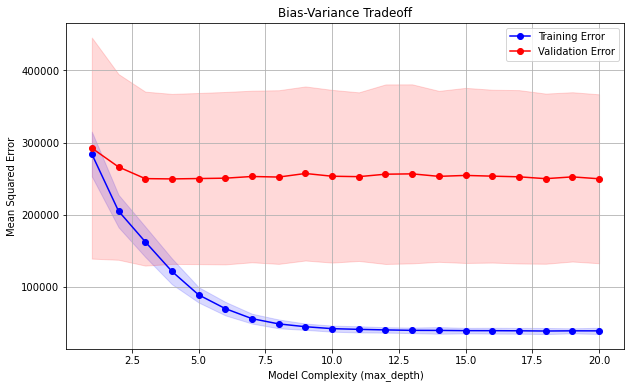

In [59]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve
import numpy as np

# Prepare the data
X = train_selected.drop('Yield', axis=1)
y = train_selected['Yield']

# Define a range of values for the parameter you want to tune (e.g., max_depth)
param_range = np.arange(1, 21, 1)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Calculate training and test scores across different parameter values
train_scores, test_scores = validation_curve(
    rf_regressor, X, y, param_name='max_depth', param_range=param_range,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2  # Add verbose for debugging
)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Error', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, label='Validation Error', color='red', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.title('Bias-Variance Tradeoff')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error on Test Set: 645451.6923012462


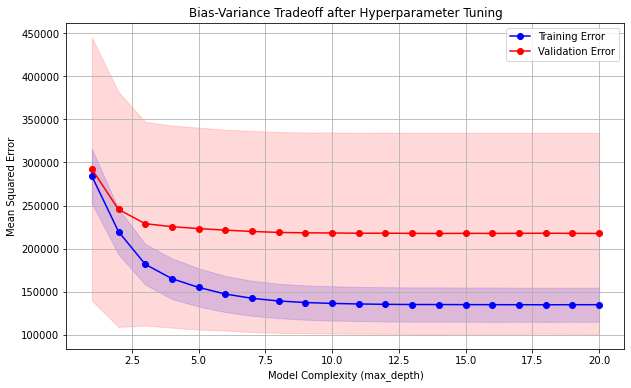

In [62]:
# Using the tuned Hyperparameters to see the change in bias-variance tradeoff:
# Initialize the RandomForestRegressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                          max_depth=best_params['max_depth'],
                                          min_samples_split=best_params['min_samples_split'],
                                          min_samples_leaf=best_params['min_samples_leaf'],
                                          random_state=42)

# Calculate training and test scores across different parameter values
train_scores, test_scores = validation_curve(
    best_rf_regressor, X, y, param_name='max_depth', param_range=param_range,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Error', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, label='Validation Error', color='red', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.title('Bias-Variance Tradeoff after Hyperparameter Tuning')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
